# Search Algorithm

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

## Load the dataset

In [3]:
df = pd.read_excel('./complete_recipes.xlsx')
df.head()

,Name,Category,ImageUrl,Method,Ingredients
0,Chicken Malai Kebab Recipe,Pakistani,https://static.toiimg.com/thumb/59558251.cms?i...,"To prepare this delicious kebab recipe, wash a...",chicken boneless : 1 kilograms ; oil : 2 tab...
1,Apple Walnut Spinach Salad Recipe,Spinach,https://static.toiimg.com/thumb/58274808.cms?i...,"Firstly, take 15 Red Maraschino and 15 Green M...",green apple : 2 1/2 ; maraschino cherry : 30 ...
2,Spicy Peanut Curry Recipe,Pakistani,https://static.toiimg.com/thumb/62402790.cms?i...,Start by boiling peanuts along with salt in a ...,peanuts : 1 cup ; green chilli : 2 ;cumin see...
3,Gond Ke Laddoo Recipe,Pakistani,https://static.toiimg.com/thumb/68357173.cms?i...,"To start preparing this delicious dessert, sta...",wheat flour : 250 gm ; ginger powder : 1 tea...
4,Radish pickle,Korean,https://img.jamieoliver.com/jamieoliver/recipe...,Trim and finely slice the radishes.In a bowl m...,radishes : 1 bunch ; red wine vinegar : 2 tab...


## Data Analytics

In [4]:
df.isna().sum()

Name           0
Category       2
ImageUrl       0
Method         0
Ingredients    0
dtype: int64

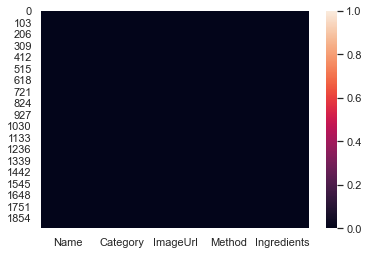

In [5]:
sns.heatmap(df.isna())

In [6]:
df.dropna(inplace=True)
df.isna().sum()

Name           0
Category       0
ImageUrl       0
Method         0
Ingredients    0
dtype: int64

## List of Categories

In [7]:
df['Category'].value_counts()

Pakistani      428
Dessert        240
Indian         177
Italian        128
Salad          126
Snacks         111
Mexican        105
Vegetarian      97
French          93
Arabian         66
Turkish         64
Soup            62
Chinese         48
Russian         48
Dips            43
Beverage        22
Beverages       19
Dip             15
American         9
Pakistan         8
Japanese         6
Gluten Free      4
Thai             4
Korean           3
Japanese         3
Spinach          2
Italian          2
Breakfast        2
Jewish           1
Beef             1
Beveages         1
Australian       1
Moroccan         1
Soups            1
Vegan            1
Persian          1
Jamaican         1
Pakisatani       1
Arabic           1
Name: Category, dtype: int64

## Separating Ingredient Names

In [8]:
ingredientNames = set()

for ingredient in df['Ingredients']:
    singleIngredient = ingredient.split(";")
    
    for i in singleIngredient:
        ingredientNames.add(i.strip().split(":")[0].strip())

In [9]:
len(ingredientNames)

2545

In [10]:
print(ingredientNames)

{'', 'wheat flour', 'marinara sauce', 'diced tomato', 'Champagne chilled', 'lemons', 'flour tortillas', 'sliced strawberry', 'ground almonds', 'cooking apple', 'dry sherry', 'grated lime zest', 'onion seeds', 'spun dry', 'medium  potato', 'sliced black olives', 'paste basil', 'grated orange peel', 'golden raisins', 'round shallots', 'clove garlic', 'corn syrup', 'spice black pepper', 'rum', 'Beshbarmak noodles', 'tofu', 'sticks  tamarind', 'colorful sprinkles', 'beefsteak tomato', 'cheese spread', 'crab meat', 'cocoa powder', 'maggie noodles', 'sliced gherkins', 'chili', 'refined oil', 'ciabatta bread', 'rolled oats', 'chopped dried dates', 'saffron threads', 'gem lettuces', 'green  apples', 'kewra', 'bread white', 'fresh bay leaves', 'boiled black beans', 'Marmite', 'apple juice', 'sandwich spread', 'unsalted butter', 'sliced smoked salmon', 'chopped capsicum', 'prosciutto', 'Olive Oil', 'Garlic', 'whole wheat bread', 'Lime Juice', 'pureed spinach', 'boiled bacon', 'lemons  juice', 'b

In [11]:
ingredientNames.remove('')

In [12]:
len(ingredientNames)

2544

In [13]:
ingredient_list = list(ingredientNames) 

In [14]:
len(ingredient_list)

2544

## Recipe Prediction

In [15]:
df.head()

,Name,Category,ImageUrl,Method,Ingredients
0,Chicken Malai Kebab Recipe,Pakistani,https://static.toiimg.com/thumb/59558251.cms?i...,"To prepare this delicious kebab recipe, wash a...",chicken boneless : 1 kilograms ; oil : 2 tab...
1,Apple Walnut Spinach Salad Recipe,Spinach,https://static.toiimg.com/thumb/58274808.cms?i...,"Firstly, take 15 Red Maraschino and 15 Green M...",green apple : 2 1/2 ; maraschino cherry : 30 ...
2,Spicy Peanut Curry Recipe,Pakistani,https://static.toiimg.com/thumb/62402790.cms?i...,Start by boiling peanuts along with salt in a ...,peanuts : 1 cup ; green chilli : 2 ;cumin see...
3,Gond Ke Laddoo Recipe,Pakistani,https://static.toiimg.com/thumb/68357173.cms?i...,"To start preparing this delicious dessert, sta...",wheat flour : 250 gm ; ginger powder : 1 tea...
4,Radish pickle,Korean,https://img.jamieoliver.com/jamieoliver/recipe...,Trim and finely slice the radishes.In a bowl m...,radishes : 1 bunch ; red wine vinegar : 2 tab...


##### User Selected Ingredients

In [16]:
selected_ingredients = ['flour','Coffee','orange','lemon','garlic', 'egg', 'cauliflower', 'potato', 'seeds']

##### One Ingredient Matches Prediction

In [46]:
selected_recipes = []

score = 0
total_score = len(selected_ingredients)

for index, recipe in df.iterrows():
    recipe_ingredient = recipe['Ingredients']
    
    for i in selected_ingredients:
        if(i.lower() in recipe_ingredient.lower()):
            selected_recipes.append(recipe)

In [49]:
pd.DataFrame(selected_recipes).drop_duplicates()

,Name,Category,ImageUrl,Method,Ingredients
0,Chicken Malai Kebab Recipe,Pakistani,https://static.toiimg.com/thumb/59558251.cms?i...,"To prepare this delicious kebab recipe, wash a...",chicken boneless : 1 kilograms ; oil : 2 tab...
1,Apple Walnut Spinach Salad Recipe,Spinach,https://static.toiimg.com/thumb/58274808.cms?i...,"Firstly, take 15 Red Maraschino and 15 Green M...",green apple : 2 1/2 ; maraschino cherry : 30 ...
2,Spicy Peanut Curry Recipe,Pakistani,https://static.toiimg.com/thumb/62402790.cms?i...,Start by boiling peanuts along with salt in a ...,peanuts : 1 cup ; green chilli : 2 ;cumin see...
3,Gond Ke Laddoo Recipe,Pakistani,https://static.toiimg.com/thumb/68357173.cms?i...,"To start preparing this delicious dessert, sta...",wheat flour : 250 gm ; ginger powder : 1 tea...
5,Baked Salmon in Maple Syrup Recipe,Pakistani,https://static.toiimg.com/thumb/74130272.cms?i...,"In a small bowl, mix maple syrup, soy sauce, g...",maple syrup : 1/4 cup ; garlic : 1 clove ;bl...
...,...,...,...,...,...
1943,Ginger Mango Chocolate Cake Recipe,Pakistani,https://static.toiimg.com/thumb/62291669.cms?i...,"To prepare the mango mousse, cut the fresh man...",whipped cream : 550 gm ; sugar : 375 gm ; le...
1944,Plum sorbet,Dessert,https://img.jamieoliver.com/jamieoliver/recipe...,"Stone and quarter the plums, then combine with...",plums : 8-10 ; sugar : 200 g ; egg white : 1 ...
1945,Paneer Moilee Recipe,Indian,https://static.toiimg.com/thumb/59333062.cms?i...,Slice onions and slit green chilies on a chopp...,coconut milk : 3 cup ; paneer : 1 kilograms...
1946,Rogan josh Scotch eggs,Russian,https://img.jamieoliver.com/jamieoliver/recipe...,Soft-boil 4 eggs in a pan of boiling salted wa...,eggs : 5 ; mixed cooked grains : 250 g ; jo...


##### 35% Ingredient Matches Prediction

In [51]:
selected_recipes = []

score = 0
total_score = len(selected_ingredients)

for index, recipe in df.iterrows():
    recipe_ingredient = recipe['Ingredients']
    
    for i in selected_ingredients:
        if(i.lower() in recipe_ingredient.lower()):
            score = score + 1
            
    achieve_score = int((score/total_score)*100)
    
    if(achieve_score > 35):
        selected_recipes.append(recipe)
        
    score = 0

In [54]:
pd.DataFrame(selected_recipes).drop_duplicates()

,Name,Category,ImageUrl,Method,Ingredients
111,Irish potato cakes with smoked salmon,Breakfast,https://img.jamieoliver.com/jamieoliver/recipe...,Liberally dust a clean work surface with flour...,flour : 80 g ; potatoes : 250 g ; egg yolk :...
121,Mutton Goli Biryani Recipe,Pakistani,https://static.toiimg.com/thumb/84465974.cms?i...,"In a bowl, add minced meat, ginger paste, garl...",ginger paste : 1 teaspoon ; clove : 2 ; basm...
143,Sweet potato muffins,Snacks,https://img.jamieoliver.com/jamieoliver/recipe...,Preheat the oven to 180°C/350°F/gas 4. Line a ...,olive oil : 2 tbs ; sweet potatoes : 600 g ; ...
306,Murgh Aloo Korma Recipe,Pakistani,https://static.toiimg.com/thumb/61709928.cms?i...,"Clean the chicken drumsticks, remove the skin ...",chicken drumsticks : 16 ; vegetable oil : 1/2...
369,Undhi Recipe,Pakistani,https://static.toiimg.com/thumb/76720017.cms?i...,"To prepare Undhi, put a kadhai on medium flame...",rice flour : 2 cup ; vegetable oil : 1 tables...
403,Roast carrot & avocado salad with orange & lem...,Salad,https://img.jamieoliver.com/jamieoliver/recipe...,If you’re going to use cooked carrots in a sal...,carrots : 500 g ; cumin seeds : 2 tbsp; dried...
414,My Nan's St. Clement's cake,Dessert,https://img.jamieoliver.com/jamieoliver/recipe...,Preheat your oven to 180°C/350°F/gas 4. Grease...,unsalted butter : 125 g ; golden caster sugar ...
452,Aam Ras Ke Aloo Recipe,Pakistani,https://static.toiimg.com/thumb/68668232.cms?i...,"To prepare this delicious dish, heat oil in a ...",potato : 400 gm ; garlic : 25 gm ; salt : 10 ...
459,Cauliflower Paneer Kofta Curry Recipe,Pakistani,https://static.toiimg.com/thumb/60935758.cms?i...,"To prepare this delicious curry recipe, wash t...",paneer : 1 cup ; onion : 4 ; corn flour : 6 ta...
510,Baby Corn Fritters Recipe,Snacks,https://static.toiimg.com/thumb/55811559.cms?i...,Combine the ginger and garlic paste along with...,corn : 2 handfuls ; chilli powder : 1 teaspoo...


In [56]:
pd.DataFrame(selected_recipes).drop_duplicates().to_dict('r')

[{'Name': 'Irish potato cakes with smoked salmon',
  'Category': 'Breakfast',
  'ImageUrl': 'https://img.jamieoliver.com/jamieoliver/recipe-database/4g64hU6rK1t96jg78whU5s.jpg?tr=w-800,h-1066',
  'Method': 'Liberally dust a clean work surface with flour. Mash the leftover potatoes or push through a sieve, then season with sea salt and black pepper. Beat the egg yolk and chop the wild garlic or chives, then add to the potatoes with the flour. Mix well.Lightly knead, then place the soft dough on the floured surface and roll out to about ½cm thick. Divide the dough into 4 and shape into rounds. Allow to chill in the fridge for at least 30 minutes, or until needed.Meanwhile, finely grate the horseradish (if using) and combine with the crème fraîche. Add a squeeze of lemon juice, salt, pepper and a dash of extra virgin olive oil.Preheat a flat griddle or non-stick frying pan until very hot, then cook the potato cakes in a little olive oil for 4 to 5 minutes on each side until golden, crisp 

In [50]:
score = 4
total_score = len(selected_ingredients)

achieve_score = int((score/total_score)*100)
achieve_score

44

In [28]:
name = "My Name is Arsalan"

s = 'Name'

if s.lower() in name.lower():
    print("Found!")
else:
    print("Not found!")

Found!
